In [9]:
include("planet_moon_star_map.jl")
import PyPlot

In [10]:
yplanet = 1.1
y1moon = 1.0
y2moon = 0.5
eps1 = 1e-5
eps2 = 0.5
map = planet_moon_star(yplanet,y1moon,y2moon,eps1,eps2) ;

Mass ratio: 1.0e-5
1000/10000
2000/10000
3000/10000
4000/10000
5000/10000
6000/10000
7000/10000
8000/10000
9000/10000
10000/10000
Range of grid, y1: 1.0841886116991581 1.0905843182668487 1.115811388300842 1.1096718262236251
Range of grid, y2: -0.047434164902525694 -0.04150015087321973 0.047434164902525694 0.04154758503812225
u1-55u2-22


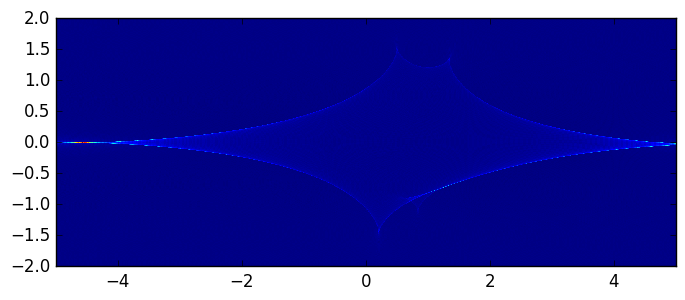

PyObject <matplotlib.image.AxesImage object at 0x31dba1b90>

In [11]:
PyPlot.imshow(map, interpolation = "nearest", extent =[-5,5,-2,2])

# We now have our map. Let's convolve it with a finite source kernel. To do that, we'll need a 1000x1000 grid of zeros, with a circular-ish section of 1s. To make sure it works, we can PyPlot.imshow it. Then convolution via conv2(B,A)

In [34]:
r_source = 25.0
sourcemap = zeros(Float64,size(map))
xsize = length(sourcemap[1,:])
ysize = length(sourcemap[:,1])
for i=1:xsize
    for j=1:ysize
        if ((i-xsize/2.0)^2.0) + ((j-ysize/2.0)^2.0) <= r_source^2.0
            sourcemap[i,j] = 1
        end
    end
end

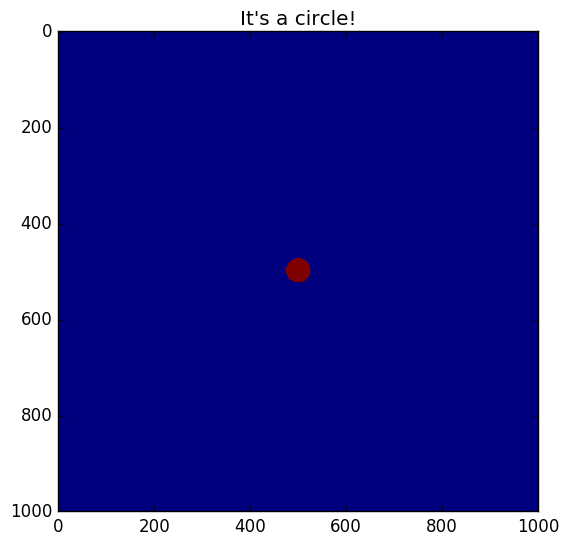

PyObject <matplotlib.text.Text object at 0x31db71e10>

In [35]:
PyPlot.imshow(sourcemap, interpolation = "nearest")
PyPlot.title("It's a circle!")

In [36]:
typeof(map)

Array{Float64,2}

In [37]:
typeof(sourcemap)

Array{Float64,2}

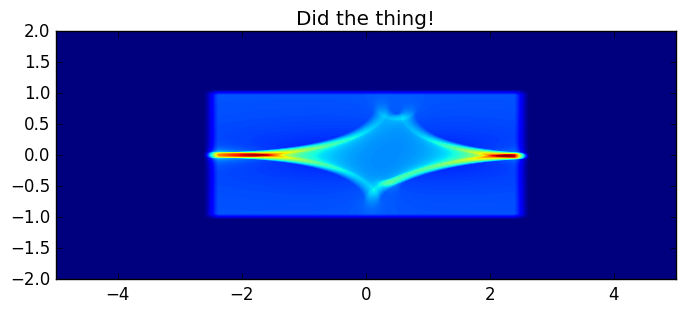

PyObject <matplotlib.text.Text object at 0x3161d2890>

In [40]:
conmap = conv2(map,sourcemap)
PyPlot.imshow(conmap, interpolation = "nearest", extent =[-5,5,-2,2])
PyPlot.title("Did the thing!")

# To do:
# 1. Make the sourcemap a circle in the 4x10 grid (currently its an ellipse not a circle, stretched by 2.5 -- 10/4 -- in the x direction).
# 2. Convolve, and either trim the convolved array or just refigure out how the axes work. Just an aspect ratio thing.
# 3. Do the actual problem set.